In [425]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [426]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d

from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [427]:
def generate_tree_diff3d(PS):
    x, y, z = [40, 80, 40]
    eta = 1
    dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x = x, y = y, z = z, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [428]:
def generate_tree_diff2d(PS):
    x, y = [40, 80]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [ ]:
#insert models here

In [429]:
simulations = 5
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [430]:
for PS in PSs:
    generated_trees[PS] = []

for PS in PSs:
    for _ in range(simulations):
        # change model here
        generated_trees[PS].append(generate_tree_diff2d(PS))
        
generated_trees

{10: [<diff2d.DLA_diff2d at 0x7ff83c873f98>,
 20: [<diff2d.DLA_diff2d at 0x7ff83ccc3c50>,
 30: [<diff2d.DLA_diff2d at 0x7ff83cc54390>,
 40: [<diff2d.DLA_diff2d at 0x7ff83cbddb00>,
 50: [<diff2d.DLA_diff2d at 0x7ff83cb6d710>,
  <diff2d.DLA_diff2d at 0x7ff83cae9cf8>]}

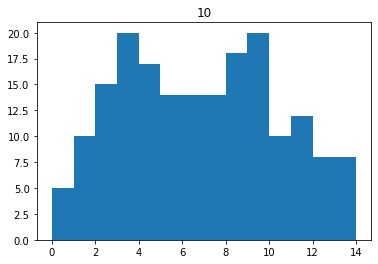

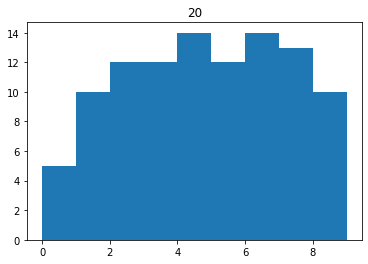

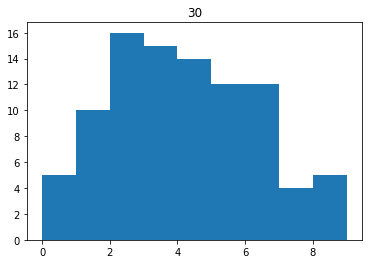

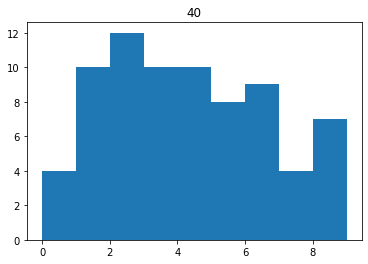

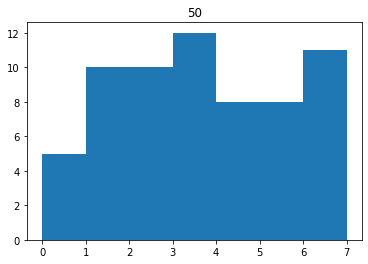

In [431]:
for PS in PSs:
    plt.figure()
    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    plt.hist(branch_orders, bins = max(branch_orders))
    plt.title("{}".format(PS))

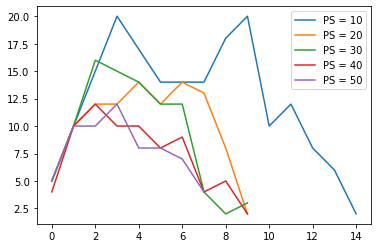

In [432]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))
    
plt.legend()
plt.show()

[0, 1, 2, 3, 3, 4, 4, 2, 1, 0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 7, 6, 5, 6, 7, 7, 6, 4, 3, 0, 1, 2, 2, 3, 4, 5, 5, 4, 5, 5, 3, 1, 0, 1, 1, 2, 3, 3, 2, 3, 3, 0, 1, 1, 2, 3, 4, 5, 6, 6, 6, 5, 4, 3, 2]


(array([ 5., 10., 10., 12.,  8.,  8., 11.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Patch objects>)

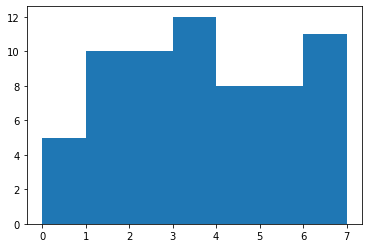

In [436]:
# c = Counter(branch_orders)

# print(c.items())
plt.hist(branch_orders, bins=max(branch_orders))

In [434]:
for PS in PSs:
    length_ratio = []

    for tree in generated_trees[PS]:
        length_ratio.append(tree.tree.get_lenghts_ratio())
    
    print("Length ratio = {} +- {}. For PS = {}".format(np.mean(length_ratio), np.std(length_ratio), PS))
    

Length ratio = 0.7706427267175757 +- 0.12611915768603946. For PS = 10
Length ratio = 0.6374622717303976 +- 0.19842187861794808. For PS = 20
Length ratio = 0.39221657950876926 +- 0.15754743848630223. For PS = 30
Length ratio = 0.5844386764284069 +- 0.06287074994608403. For PS = 40
Length ratio = 0.3632434938691566 +- 0.13491806746509238. For PS = 50


In [435]:
for PS in PSs:
    asym = []

    for tree in generated_trees[PS]:
        asym.append(tree.tree.get_asymmetry_index())
    
    print("Asymmetry index = {} +- {}. For PS = {}".format(np.mean(asym), np.std(asym), PS))
    

Asymmetry index = 0.6662351064827845 +- 0.06937346370745932. For PS = 10
Asymmetry index = 0.7272222222222222 +- 0.1474306700423484. For PS = 20
Asymmetry index = 0.6881673881673882 +- 0.12416660582363356. For PS = 30
Asymmetry index = 0.7102164502164501 +- 0.12331010586314332. For PS = 40
Asymmetry index = 0.6047619047619047 +- 0.21234571563336474. For PS = 50
